#### Data Cleaning

In [1]:
#Importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


#for box-cox transformation
from scipy import stats
#for min_max scaling
from mlxtend.preprocessing import minmax_scaling

#set seed for reproducibility
np.random.seed(0)

In [2]:
#Importing geolocation packages
#import geoplot as gplt
#import geopandas as gpd
#import geoplot.crs as gcrs
#import imageio
#import pathlib
#import mapclassify as mc

In [3]:
#Loading the datasets
fossil_fuel_consumption = pd.read_csv("Fossil_Fuel_energy_Consumption/ffec.csv", skiprows=3)
countries = pd.read_csv("Fossil_Fuel_energy_Consumption/ffec.csv",skiprows=3)
fossil_fuel_consumption.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,46.895180,49.304292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,23.081635,23.471278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,46.508554,48.305593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#set seed for reproducibility
np.random.seed(0)

##### How many missing data points do we have?

In [5]:
missing_values_count = fossil_fuel_consumption.isnull().sum()
print(missing_values_count[4:10])

1960    220
1961    221
1962    222
1963    221
1964    221
1965    219
dtype: int64


In [6]:
total_cells = np.product(fossil_fuel_consumption.shape)
total_missing = missing_values_count.sum()

#Percentage of missing values from this dataset
percent_missing = (total_missing/total_cells)*100
print(percent_missing)

#This is such a huge number of missing values especially for the kind of analysis I wish to undertake 
#(Almost half the dataset is empty)


48.15957804960161


##### Figure out why the data is missing!

In [7]:
# Is the value missing because it wasn't recorded or because it doesn't exist? Try: NaN or imputation as solutions

In [8]:
missing_values_count[0:10]

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              220
1961              221
1962              222
1963              221
1964              221
1965              219
dtype: int64

In [9]:
#Option 1: Drop missing values
fossil_fuel_consumption.dropna()  #Oops we removed all our data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66


In [10]:
fossil_fuel_consumption.dropna(axis=1)  #Dropping NaN columns is also not feasible. 

,Country Name,Country Code,Indicator Name,Indicator Code
0,Aruba,ABW,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS
1,Africa Eastern and Southern,AFE,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS
2,Afghanistan,AFG,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS
3,Africa Western and Central,AFW,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS
4,Angola,AGO,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS
...,...,...,...,...
261,Kosovo,XKX,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS
262,"Yemen, Rep.",YEM,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS
263,South Africa,ZAF,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS
264,Zambia,ZMB,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS


In [11]:
print("Columns in original dataset: \n",  fossil_fuel_consumption.shape[1])
print("Columns with NaN's dropped: \n" , fossil_fuel_consumption.dropna(axis=1).shape[1])

Columns in original dataset: 
 67
Columns with NaN's dropped: 
 4


#### Filling in missing values automatically

In [12]:
ffec = fossil_fuel_consumption.fillna(0)
ffec.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Africa Eastern and Southern,AFE,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,46.895180,49.304292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Africa Western and Central,AFW,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,23.081635,23.471278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Angola,AGO,Fossil fuel energy consumption (% of total),EG.USE.COMM.FO.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,46.508554,48.305593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Scaling and Normalization


In [13]:
#Scaling - you change the range of your data (using SVM and K-nearest neighbors (KNN))
#Normalization - you change the shape of the distribution of your data

#Scaling help one to compare different variables on equal footing. 
#MinMax Scaler shrinks the data within the given range, usually of 0 to 1. 
#It transforms data by scaling features to a given range. 
#It scales the values to a specific value range without changing the shape of the original distribution 

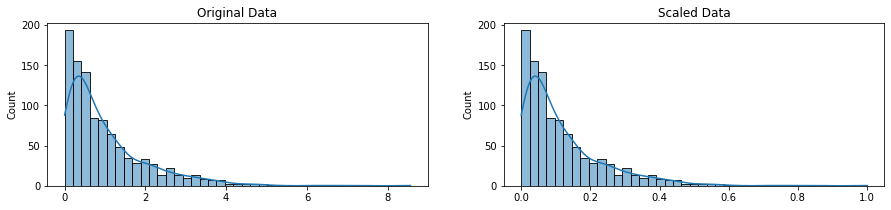

In [14]:
#Generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)
#Min-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

#Plot both together to compare
fig, ax = plt.subplots(1,2, figsize=(15,3))
sns.histplot(original_data, ax=ax[0], kde =True, legend= False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data,ax=ax[1], kde = True, legend = False)
ax[1].set_title("Scaled Data")
plt.show()

In [15]:
#Normalization
#The point of normalization is to change your observations so that they can be described as a normal distribution
#Normal distribution - bell curve
#To use ML or statistics techniques such as linear discriminant analysis (LDA) and Gaussian Naive Bayes, the assumption is that 
#your data is already normalized
#Uses the box cox transformation method


Text(0.5, 1.0, 'Normalized Data')

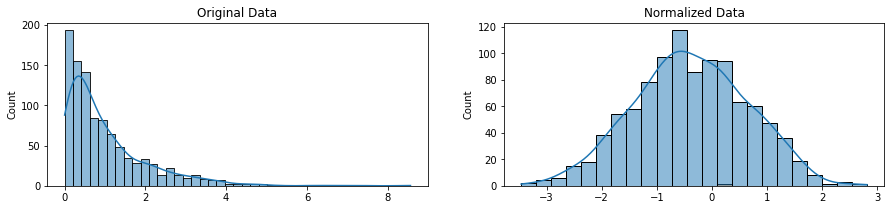

In [16]:
normalized_data = stats.boxcox(original_data)
fig, ax = plt.subplots(1,2, figsize = (15,3))
sns.histplot(original_data, ax=ax[0], kde = True, legend = False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data, ax=ax[1], kde = True, legend = False)
ax[1].set_title("Normalized Data")

### Understanding Box-cox power transformation that seeks to stabilize the variance into a normal distribution
$$  y_{i}^{\lambda }=\exp({\lambda \ln(y_{i})})=1+\lambda \ln(y_{i})+O((\lambda \ln(y_{i}))^{2}) $$
$$ y_{i}^{\lambda }=\exp({\lambda \ln(y_{i})})=1+\lambda \ln(y_{i})+O((\lambda \ln(y_{i}))^{2})$$

In [17]:
original_data.shape   #1000 single items

(1000,)

###### Weather Dataset

In [18]:
WW2_Weather = pd.read_csv("Weather Station Locations.csv",delimiter=",",skiprows=0)
WW2_Weather.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


#### Parsing Dates

In [19]:
#Landslide after Rainfall 2007-2016
#Location and cause of landslide events around the world

Landslide = pd.read_csv('catalog.csv')
Landslide.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [20]:
print(Landslide['date'].head())  #Prints out the first 5 data series of the date column

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [21]:
Landslide['date'].dtype

dtype('O')

###### Convert our date columns to datetime

In [22]:
Landslide['date_parsed'] = pd.to_datetime(Landslide['date'], format="%m/%d/%y")
Landslide['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [23]:
#For date entries with multiple date formats
Landslide['date_parsed_2'] = pd.to_datetime(Landslide['date'], infer_datetime_format = True)
Landslide['date_parsed_2'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed_2, dtype: datetime64[ns]

In [24]:
#selecting the day of the month from the date column data
day_of_month_landslides = Landslide['date_parsed'].dt.day
day_of_month_landslides

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
        ... 
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: date_parsed, Length: 1693, dtype: float64

In [25]:
#selecting year of landslide occurrence
yr_landslide = Landslide['date_parsed'].dt.year
yr_landslide.head()

0    2007.0
1    2007.0
2    2007.0
3    2007.0
4    2007.0
Name: date_parsed, dtype: float64

In [26]:
#Selecting the month of the landslide
mth_landslide = Landslide['date_parsed'].dt.month
mth_landslide.head()

0    3.0
1    3.0
2    4.0
3    4.0
4    4.0
Name: date_parsed, dtype: float64

###### Plot the day of the month to check the date parsing

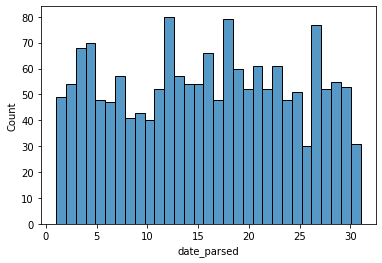

In [30]:
day_of_month_landslides = day_of_month_landslides.dropna()
sns.histplot(day_of_month_landslides, kde=False, bins=31)
plt.show()
#KDE - Kernel Density Estimation is a way to estimate the probability density function of a continuous random variable

In [28]:
dt_len = Landslide.date.str.len()
dt_len.value_counts()

7.0    1075
6.0     368
8.0     247
Name: date, dtype: int64

In [29]:
indices = np.where([dt_len == 8])[1]
#print("Indices with corrupted data: ", indices)
Landslide.loc[indices]

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,date_parsed,date_parsed_2
44,301,10/11/07,NaN,NaN,Costa Rica,CR,Alajuela,7014,Atenas,3.08459,...,Mudslide,Large,Rain,NaN,NaN,14.0,"Agence France-Presse, afp.google.com",http://afp.google.com/article/ALeqM5hu6a8oyAM1...,2007-10-11,2007-10-11
45,302,10/11/07,NaN,NaN,Costa Rica,CR,San José,26669,NaN,9.56251,...,Landslide,Large,Rain,NaN,NaN,10.0,International Herald,http://www.iht.com/articles/ap/2007/10/12/amer...,2007-10-11,2007-10-11
46,303,10/12/07,NaN,NaN,Haiti,HT,Ouest,3951,Cabaret,0.51272,...,Complex,Large,Rain,NaN,NaN,23.0,Euronews.net,http://www.euronews.net/index.php?page=info&ar...,2007-10-12,2007-10-12
47,304,10/12/07,NaN,NaN,Jamaica,JM,St. Elizabeth,1371,Maggotty,4.57363,...,Complex,Medium,Rain,NaN,NaN,NaN,RadioJamaica,http://www.radiojamaica.com/content/view/2039/26/,2007-10-12,2007-10-12
48,307,10/13/07,NaN,SA,Colombia,CO,Cauca,9985,Suárez,8.46579,...,Mudslide,Large,Continuous rain,NaN,NaN,24.0,Reuters - AlertNet.org,http://www.reuters.com/article/newsOne/idUSN13...,2007-10-13,2007-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,7507,11/11/15,NaN,NaN,Panama,PA,Chiriquí,2823,Monte Lirio,6.74338,...,Landslide,Small,Downpour,NaN,0.0,0.0,Bugaba,http://www.soydebugaba.com/noticias/fuertes-ll...,2015-11-11,2015-11-11
1670,7515,10/21/15,NaN,NaN,Mexico,MX,Chiapas,19092,Motozintla de Mendoza,2.06743,...,Landslide,Medium,Rain,NaN,0.0,0.0,azteca noticias,http://www.aztecanoticias.com.mx/notas/estados...,2015-10-21,2015-10-21
1671,7516,10/21/15,NaN,NaN,Mexico,MX,Chiapas,18608,Emiliano Zapata,4.68443,...,Landslide,Medium,Rain,cold front No. 7,0.0,0.0,azteca noticias,http://www.aztecanoticias.com.mx/notas/estados...,2015-10-21,2015-10-21
1673,7518,10/15/15,NaN,NaN,Mexico,MX,Tabasco,32415,Tenosique de Pino Suárez,15.22260,...,Landslide,Medium,Flooding,NaN,0.0,0.0,ver tiente global,http://vertienteglobal.com/?p=49401,2015-10-15,2015-10-15
